In [1]:
#//*************************************************************************
#//*** Downloads Stock Data and converts the returns to a dataframe,
#//*** which saves a compressed CSV file in the stocks folder
#//*************************************************************************
import json
import requests
import time
import pandas as pd
import platform
import csv
import numpy as np
import playsound
from IPython.display import clear_output
import math 

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from matplotlib import pyplot as plt


sound_filename = "sms-alert-4-daniel_simon.mp3"
#playsound.playsound(sound_filename)

#//*********************************************************************************
#//*** Read the API keys from a JSON encoded file
#//*** Located in the ignore_folder sub directory
#//*** This Folder is added to the .gitignore file and does not show up on Github
#//*** This is Authentication Best Practices for Github
#//*********************************************************************************
f = open("./ignore_folder/alpha_vantage_api.json", "r")

#//*** Fugley Pythonic type conversion
#//*** Loads the file into Dictionary via JSON.loads
#//*** Gets the API key value using the 'api' key
#//*** prepends apikey= so the resulting value is URL ready :]
av_apikey = json.loads(f.read())['apikey']
f.close()

#//*** Load the Stock Tickers
f = open(".\\data\\stock_tickers_ape.json", "r")
symbols = json.loads(f.read())['symbols']

#//*** Just get amc for testing
#symbols = [ "bb" ]

symbols = ['ATOS','SPY','NVCN','CTXR','ACST','DNN','AMD','SPRT','TDA','SENS','IMTE','GSAT','GNUS','AL','XELA','ZOM','WPRT','WHLR','TY','TTOO','TNXP','TBLT','SWI','SQBG','SNMP','RS','TSLA','RGLS','POWW','OIL','OI','OCGN','NRBO','NOC','NET','MVIS','MU','MSM','MSFT','MRNA','MMT','MIK','METX','LODE','LMT','IQ','IBKR','HGEN','GORO','GL','GE','FUV','FSR','CORT','CLOV','CFMS','CEI','BYSI','BTG','BNGO','BLNK','AUMN','ATVI','ASRT','AAPL','AMC','ASM','FAMI','CRTD','PT']
symbols = ['rkt']
symbols = ['SABR']
symbols = ['DIDI']
symbols = ['sabr','ATOS','DIDI','SPY','NVCN','CTXR','ACST','DNN','AMD','SPRT','TDA','SENS','IMTE','GSAT','GNUS','AL','XELA','ZOM','WPRT','WHLR','TY','TTOO','TNXP','TBLT','SWI','SQBG','SNMP','RS','TSLA','RGLS','POWW','OIL','OI','OCGN','NRBO','NOC','NET','MVIS','MU','MSM','MSFT','MRNA','MMT','MIK','METX','LODE','LMT','IQ','IBKR','HGEN','GORO','GL','GE','FUV','FSR','CORT','CLOV','CFMS','CEI','BYSI','BTG','BNGO','BLNK','AUMN','ATVI','ASRT','AAPL','AMC','ASM','FAMI','CRTD','PT']#symbols = ['eth']
symbols = ['AAPL']#symbols = ['eth']
#symbols = ['SABR']
print(symbols)

['AAPL']


In [89]:
try:
    symbol
except:
    symbol = symbols[0]
    action = "daily"
input_filename = f"./stocks/{symbol}_{action}.csv.zip"

#//*** Convert Path to Mac formatting if needed
#if platform.system() == 'Darwin':
    #output_filename = output_filename.replace("\\","/")


print(f"Reading dataframe from File: {input_filename}")
out_df = pd.read_csv(input_filename)

out_df = out_df.sort_values(by='date',ascending=True)
out_df = out_df.reset_index(drop=True)
out_df['date'] = pd.to_datetime(out_df['date'])
print(out_df)
cl = out_df['close'].astype('float32')
train = cl[0:int(len(cl)*0.80)]
scl = MinMaxScaler()
#Scale the data
scl.fit(train.values.reshape(-1,1))
cl =scl.transform(cl.values.reshape(-1,1))
#Create a function to process the data into lb observations look back slices
# and create the train test dataset (90-10)
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
lb=10
X,y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]
print(X_train.shape[0],X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])
print(y_train.shape[0])
print(y_test.shape[0])

#Build the model
model = keras.models.Sequential()
model.add(layers.LSTM(256,input_shape=(lb,1)))
model.add(layers.Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
#history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)
history = model.fit(X_train,y_train,epochs=50,shuffle=False)
model.summary() 

playsound.playsound(sound_filename)

baseline = {
    "X_test" : X_test,
    "y_test" : y_test,
    
}

Reading dataframe from File: ./stocks/AAPL_daily.csv.zip
           date symbol    open    high     low   close     volume
0    1999-11-01   AAPL   80.00   80.69   77.37   77.62    2487300
1    1999-11-02   AAPL   78.00   81.69   77.31   80.25    3564600
2    1999-11-03   AAPL   81.62   83.25   81.00   81.50    2932700
3    1999-11-04   AAPL   82.06   85.37   80.62   83.62    3384700
4    1999-11-05   AAPL   84.62   88.37   84.00   88.31    3721500
...         ...    ...     ...     ...     ...     ...        ...
5626 2022-03-11   AAPL  158.93  159.28  154.50  154.73   96970102
5627 2022-03-14   AAPL  151.45  154.12  150.10  150.62  108732111
5628 2022-03-15   AAPL  150.90  155.57  150.38  155.09   92964302
5629 2022-03-16   AAPL  157.05  160.00  154.46  159.59  102300157
5630 2022-03-17   AAPL  158.61  161.00  157.63  160.62   75615376

[5631 rows x 7 columns]
5058 10
562 10
5058
562
Epoch 1/50
159/159 [==============================] - 3s 12ms/step - loss: 0.0020
Epoch 2/50
159/159 [

Text(0.5, 1.0, 'Train Dataset')

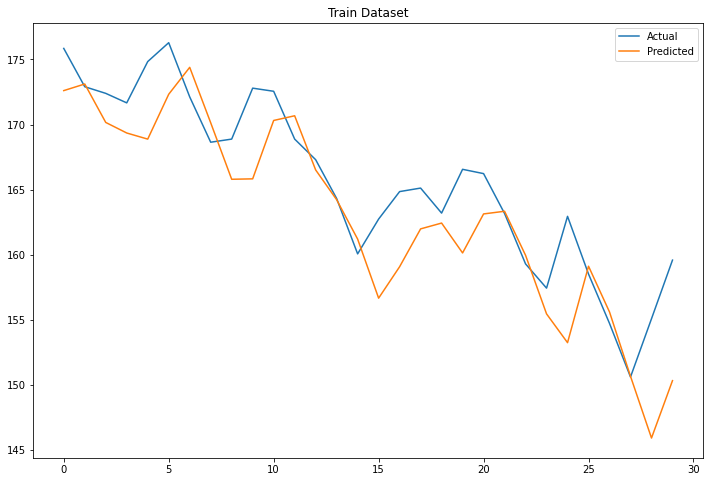

In [90]:
del y_test
del X_test

X_test = baseline["X_test"]
y_test = baseline["y_test"]
#//*** 20 Epochs
plt.figure(figsize=(12,8))
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)[-30:]), label="Actual")
plt.plot(scl.inverse_transform(Xt)[-30:], label="Predicted")
plt.legend()
plt.title("Train Dataset")


In [48]:
try:
    symbol
except:
    symbol = symbols[0]
    action = "daily"
input_filename = f"./stocks/{symbol}_{action}.csv.zip"

#//*** Convert Path to Mac formatting if needed
#if platform.system() == 'Darwin':
    #output_filename = output_filename.replace("\\","/")

def build_reference_model(df,epochs):
    cl = df['close'].astype('float32')
    train = cl[0:int(len(cl)*0.80)]
    scl = MinMaxScaler()
    #Scale the data
    scl.fit(train.values.reshape(-1,1))
    cl =scl.transform(cl.values.reshape(-1,1))
    #Create a function to process the data into lb observations look back slices
    # and create the train test dataset (90-10)
    def processData(data,lb):
        X,Y = [],[]
        for i in range(len(data)-lb):
            X.append(data[i:(i+lb),0])
            Y.append(data[(i+lb),0])
        return np.array(X),np.array(Y)

    lb=10
    X,y = processData(cl,lb)
    X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
    y_train,y_test = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]
    print(X_train.shape[0],X_train.shape[1])
    print(X_test.shape[0], X_test.shape[1])
    print(y_train.shape[0])
    print(y_test.shape[0])

    #Build the model
    model = keras.models.Sequential()
    model.add(layers.LSTM(256,input_shape=(lb,1)))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam',loss='mse')
    #Reshape data for (Sample,Timestep,Features) 
    X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
    X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
    #Fit model with history to check for overfitting
    #history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)
    history = model.fit(X_train,y_train,epochs=epochs,shuffle=False)
    model.summary() 

    playsound.playsound(sound_filename)

    results = {
        
        "actual" : scl.inverse_transform(y_test.reshape(-1,1)),
        "predict" : scl.inverse_transform(model.predict(X_test)),
        "predict_date" : df['date'][len(X_test)*-1:].dt.date,

    }
    
    return results
    
    
print(f"Reading dataframe from File: {input_filename}")
out_df = pd.read_csv(input_filename)

out_df = out_df.sort_values(by='date',ascending=True)
out_df = out_df.reset_index(drop=True)
out_df['date'] = pd.to_datetime(out_df['date'])
out_df = out_df[ out_df['date'] >= out_df['date'].max()-pd.DateOffset(months=12 )]

baseline = build_reference_model(out_df,10)



Reading dataframe from File: ./stocks/AAPL_daily.csv.zip
219 10
25 10
219
25
Epoch 1/10
7/7 [==============================] - 2s 13ms/step - loss: 0.0187
Epoch 2/10
7/7 [==============================] - 0s 13ms/step - loss: 0.0267
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0060
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0097
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0048
Epoch 6/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0051
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0050
Epoch 8/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0046
Epoch 9/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 10/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0048
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape            

25 25


Text(0.5, 1.0, 'Train Dataset')

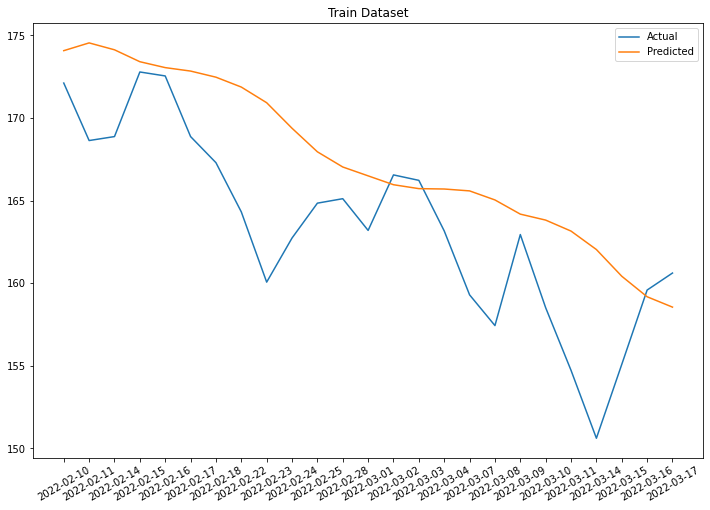

In [49]:

plot_actual = baseline['actual']
plot_predict = baseline["predict"]
predict_date = baseline["predict_date"]

print(len(plot_actual),len(predict_date))
#//*** 20 Epochs
plt.figure(figsize=(12,8))

plt.plot(plot_actual, label="Actual")
plt.plot(plot_predict, label="Predicted")
plt.xticks(ticks=range(len(plot_actual)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("Train Dataset")


In [55]:
#Create a function to process the data into lb observations look back slices
# and create the train test dataset (90-10)
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

def build_model(num_layers,lb,activation):
    model = keras.models.Sequential()
    model.add(layers.LSTM(num_layers,activation=activation, input_shape=(lb,1)))
    
    #//*** Hidden Layers Don't seem to be the answer
    #model.add(layers.LSTM(num_layers,activation=activation,return_sequences=True, input_shape=(lb,1)))
    #model.add(layers.LSTM(num_layers,activation=activation,return_sequences=True) )
    #model.add(layers.LSTM(num_layers,activation=activation) )
    model.add(layers.Dense(1))
    model.compile(optimizer='adam',loss='mse')
    
    return model
    
#//**** Model Parameters
mp = {
    'size' : 120, #//*** Total number of days to model
    'lb' : 10, #//*** Look Back, how many days prior to consider as part of the LSTM model
    'layers' : 256,
    'epochs' : 10,
    'months_to_model' : 10,
    'days_to_model' : 10,
    'activation' : 'relu',
    'type' : 'whole'
    
}
#running_loss
hp = {
    'rolling' : 10,
    'rolling_means' : [],
    'rolling_dif' : [],
}

try:
    symbol
except:
    symbol = symbols[0]
    action = "daily"
input_filename = f"./stocks/{symbol}_{action}.csv.zip"

print(f"Reading dataframe from File: {input_filename}")
out_df = pd.read_csv(input_filename)

out_df = out_df.sort_values(by='date',ascending=True)
out_df = out_df.reset_index(drop=True)
out_df['date'] = pd.to_datetime(out_df['date']).dt.date
print(len(out_df))
out_df = out_df[ out_df['date'] >= out_df['date'].max()-pd.DateOffset(months=mp['months_to_model']) ]
print(len(out_df))

epochs = -1

predictions = []
actuals = []
predict_date = []
max_loop = len(out_df)-mp['days_to_model']
start_time = time.time()

print("-----")
for loop_index in range(mp['days_to_model']-1,0,-1):
    #print(loop_index)
    print("=== REFERENCE ===")
    print(out_df.iloc[range(0,len(out_df)-loop_index)])
    
    loop_time = time.time()
    #//*** Collect range of data between base_index and mp['size']
    max_index = len(out_df)-loop_index
    
    cl = out_df.iloc[0:max_index]['close'].astype('float32')
    
    y_test = out_df.iloc[max_index]['close'].astype('float32')
    print("=== CL ===")
    print(cl)
    
    #//*** Scale the Data between 0 and 1
    scl = MinMaxScaler()

    #//*** Scale and reshape the data. Each value is returned as a list within a list
    cl = scl.fit_transform(cl.values.reshape(-1,1))
    #print(cl)
    
    #//*** Build Data for Lookback arrays
    X_train,y_train = processData(cl,mp['lb'])

    #print("== X ==")
    #print(X_train)
    #print("== y ==")
    #print(y_train)

    #print(X_train.shape,y_train.shape)
    
    #//*** Build the test value using the last element of X_train
    x_test = X_train[-1]

    #//*** Remove the first element
    x_test = np.delete(x_test,0)
    #//*** Add the last element of y_train, as our predict ahead
    x_test = np.append(x_test,y_train[-1])
    
    disp_x_train = X_train    
    
    X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
    #X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
    #Fit model with history to check for overfitting

    #//*** Reshape x_test to match the X_train shape
    x_test = X_train[-1].reshape((X_train[-1].shape[1],X_train[-1].shape[0],1))

    
    model = build_model(mp['layers'],mp['lb'],mp['activation'])

        
    model.fit(X_train,y_train,epochs=mp['epochs'],shuffle=False,verbose=1)
    
    Xt = model.predict(x_test)
    
    predict = scl.inverse_transform(Xt)[0][0]
    predictions.append(predict)
    actuals.append(y_test)
    predict_date.append(out_df.iloc[max_index]['date'])
    remain_loop = loop_index
    cycle_time = int(time.time() - loop_time)
    
    #clear_output(wait=True)
    print(loop_index,"/",mp['days_to_model'],"[",predict,"] - ",y_test, " ",cycle_time, "s - remaining: ",cycle_time*remain_loop,"s" )
    print("======")
    #break
    #    #break
    
    if True: #//*** Print as needed
        print(out_df.iloc[loop_index:max_index])

        print("X_Train")
        
        #print(scl.inverse_transform(x_test.reshape(-1,1)).reshape(1,-1))
        for n in scl.inverse_transform(disp_x_train)[-10:]:
            print(n[-5:])
        print("Y_train")
        print(scl.inverse_transform(y_train.reshape(-1,1))[-10:])
        print("X_test")
        print(scl.inverse_transform(x_test.reshape(-1,1)).reshape(1,-1))
        print("Actual:")
        print(out_df.iloc[max_index])
        print("y_test:",y_test)
        print(out_df.iloc[max_index]['date'])

total_time = int(time.time() - start_time)

print("=================")
print("DONE: ", total_time,"secs")
print("=================")
playsound.playsound(sound_filename)

Reading dataframe from File: ./stocks/AAPL_daily.csv.zip
5631
212
-----
=== REFERENCE ===
            date symbol     open     high     low   close    volume
5419  2021-05-17   AAPL  126.820  126.930  125.17  126.27  74244624
5420  2021-05-18   AAPL  126.560  126.990  124.78  124.85  63342929
5421  2021-05-19   AAPL  123.160  124.915  122.86  124.69  92611989
5422  2021-05-20   AAPL  125.230  127.720  125.10  127.31  76857123
5423  2021-05-21   AAPL  127.820  128.000  125.21  125.43  79295436
...          ...    ...      ...      ...     ...     ...       ...
5617  2022-02-28   AAPL  163.060  165.420  162.43  165.12  95056629
5618  2022-03-01   AAPL  164.695  166.600  161.97  163.20  83474425
5619  2022-03-02   AAPL  164.390  167.360  162.95  166.56  79724750
5620  2022-03-03   AAPL  168.470  168.910  165.55  166.23  76678441
5621  2022-03-04   AAPL  164.490  165.550  162.10  163.17  83819592

[203 rows x 7 columns]
=== CL ===
5419    126.269997
5420    124.849998
5421    124.690002
54

7/7 [==============================] - 1s 9ms/step - loss: 0.2270
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0515
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0317
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0250
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0169
Epoch 6/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0075
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 8/10
7/7 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 9/10
7/7 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 10/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0072
7 / 10 [ 162.71521 ] -  162.95   1 s - remaining:  7 s
            date symbol     open    high     low   close     volume
5426  2021-05-26   AAPL  126.955  127.39  126.42  126.85   56575920
5427  2021-05-27   AAPL  126.440  127.64  

[202 rows x 7 columns]
X_Train
[168.88 167.3  164.32 160.07 162.74]
[167.3  164.32 160.07 162.74 164.85]
[164.32 160.07 162.74 164.85 165.12]
[160.07 162.74 164.85 165.12 163.2 ]
[162.74 164.85 165.12 163.2  166.56]
[164.85 165.12 163.2  166.56 166.23]
[165.12 163.2  166.56 166.23 163.17]
[163.2  166.56 166.23 163.17 159.3 ]
[166.56 166.23 163.17 159.3  157.44]
[166.23 163.17 159.3  157.44 162.95]
Y_train
[[164.85]
 [165.12]
 [163.2 ]
 [166.56]
 [166.23]
 [163.17]
 [159.3 ]
 [157.44]
 [162.95]
 [158.52]]
X_test
[[162.74 164.85 165.12 163.2  166.56 166.23 163.17 159.3  157.44 162.95]]
Actual:
date      2022-03-11
symbol          AAPL
open          158.93
high          159.28
low            154.5
close         154.73
volume      96970102
Name: 5626, dtype: object
y_test: 154.73
2022-03-11
=== REFERENCE ===
            date symbol     open     high     low   close     volume
5419  2021-05-17   AAPL  126.820  126.930  125.17  126.27   74244624
5420  2021-05-18   AAPL  126.560  126.990  124

Epoch 1/10
7/7 [==============================] - 1s 10ms/step - loss: 0.2290
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0523
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0333
Epoch 4/10
7/7 [==============================] - 0s 8ms/step - loss: 0.0292
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 6/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0076
Epoch 7/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0097
Epoch 8/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 9/10
7/7 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 10/10
7/7 [==============================] - 0s 9ms/step - loss: 0.0074
2 / 10 [ 160.01411 ] -  159.59   1 s - remaining:  2 s
            date symbol     open     high     low   close     volume
5421  2021-05-19   AAPL  123.160  124.915  122.86  124.69   92611989
5422  2021-05-20   AAPL  125.

Run Time:  17 s
Total Models:  202
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 10, 'months_to_model': 10, 'days_to_model': 10, 'activation': 'relu', 'type': 'whole'}
9 9


Text(0.5, 1.0, 'Baseline Dataset')

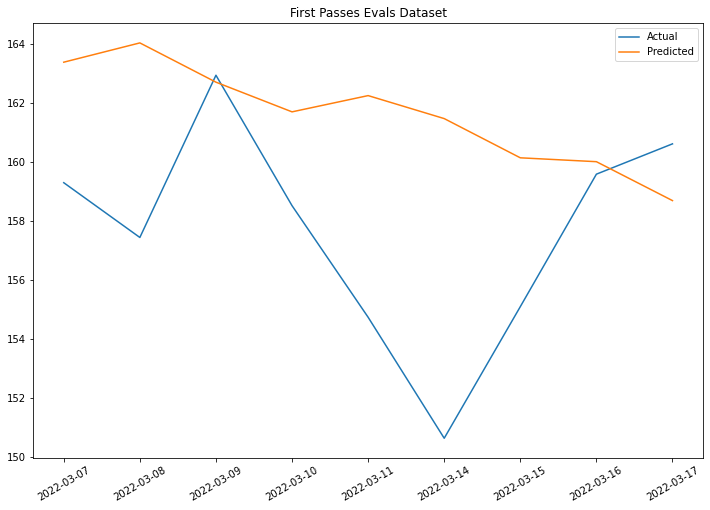

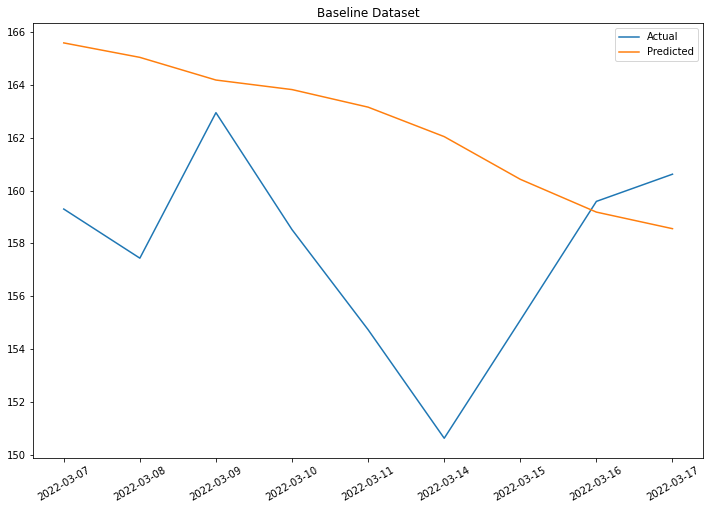

In [57]:
#//***** 256 Layers EPOCHS: overfit  -- LB 10 == - activation: relu Data Set: 24 months O Run #3, 
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

    



bl_plot_actual = baseline['actual'][len(actuals)*-1:]
bl_plot_predict = baseline["predict"][len(actuals)*-1:]
bl_predict_date = baseline["predict_date"][len(actuals)*-1:]

print(len(plot_actual),len(predict_date))
#//*** 20 Epochs
plt.figure(figsize=(12,8))

plt.plot(bl_plot_actual, label="Actual")
plt.plot(bl_plot_predict, label="Predicted")
plt.xticks(ticks=range(len(bl_predict_date)),labels=bl_predict_date, rotation = 30)
plt.legend()

plt.title("Baseline Dataset")


Run Time:  715 s
Total Models:  496
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 50, 'months_to_model': 24, 'days_to_model': 10, 'activation': 'relu', 'type': 'whole'}


Text(0.5, 1.0, 'First Passes Evals Dataset')

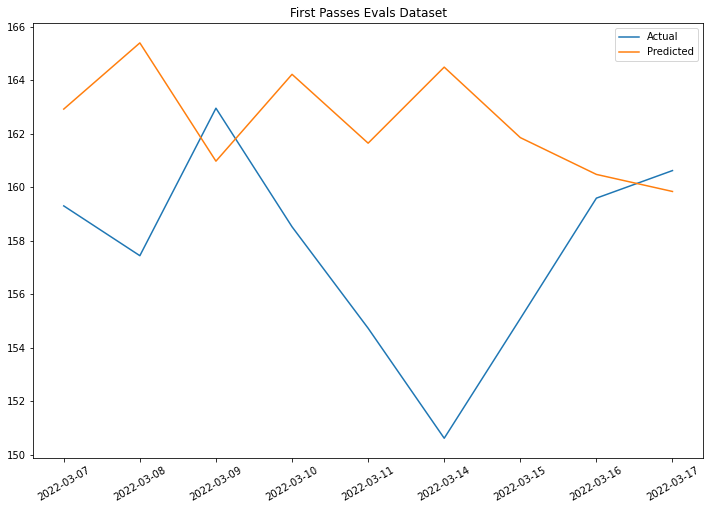

In [84]:
#//***** 256 Layers EPOCHS: overfit  -- LB 10 == - activation: relu Data Set: 24 months O Run #2
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

    




Run Time:  749 s
Total Models:  496
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 50, 'months_to_model': 24, 'days_to_model': 10, 'activation': 'relu', 'type': 'whole'}


Text(0.5, 1.0, 'First Passes Evals Dataset')

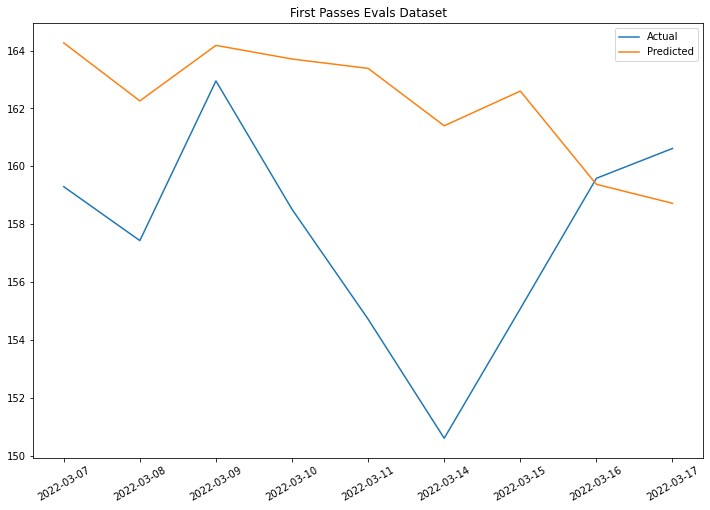

In [82]:
#//***** 256 Layers EPOCHS: overfit  -- LB 10 == - activation: relu Data Set: 24 months O Run #1
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

    




Run Time:  222 s
Total Models:  496
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 50, 'months_to_model': 24, 'days_to_model': 10, 'activation': 'relu', 'type': 'whole'}


Text(0.5, 1.0, 'First Passes Evals Dataset')

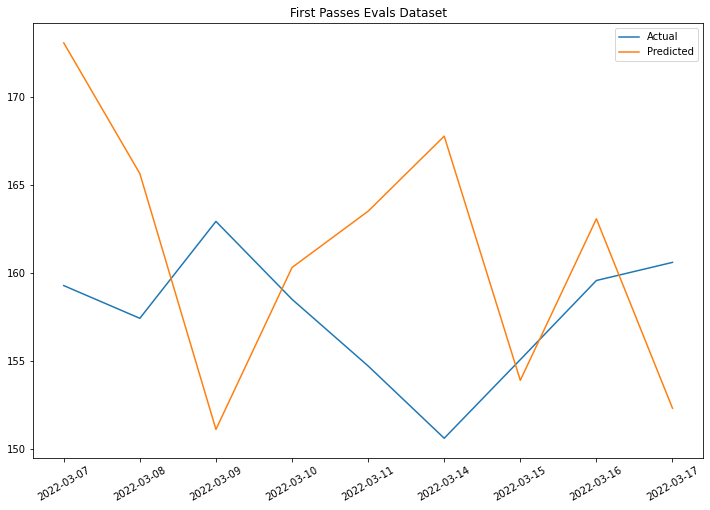

In [42]:
#//***** 256 Layers 50 EPOCHS -- LB 10 == - activation: relu Data Set: 24 months Run #2
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

    




Run Time:  220 s
Total Models:  496
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 50, 'months_to_model': 24, 'days_to_model': 10, 'activation': 'relu', 'type': 'whole'}


Text(0.5, 1.0, 'First Passes Evals Dataset')

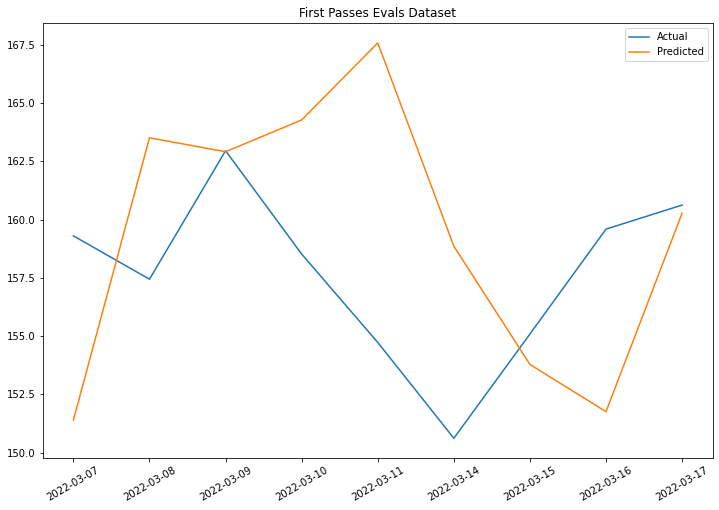

In [40]:
#//***** 256 Layers 50 EPOCHS -- LB 10 == - activation: relu Data Set: 24 months Run #1
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

    




Run Time:  98 s
Total Models:  496
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 20, 'months_to_model': 24, 'days_to_model': 10, 'activation': 'relu', 'type': 'whole'}


Text(0.5, 1.0, 'First Passes Evals Dataset')

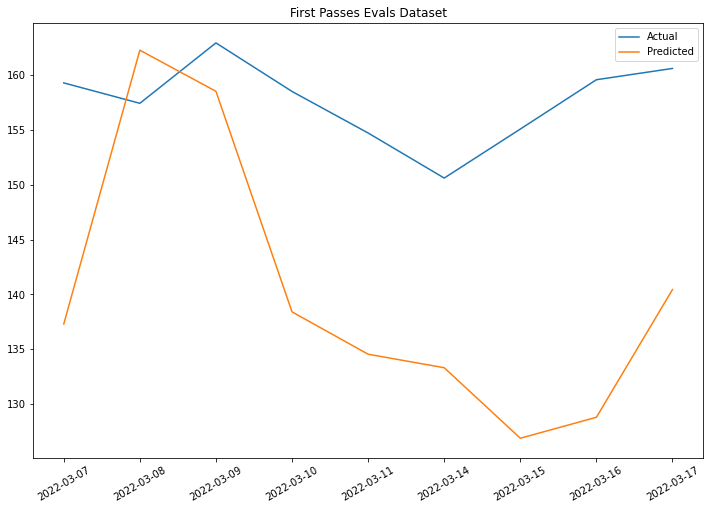

In [36]:
#//***** 256 Layers 20 EPOCHS -- LB 10 == - activation: relu Data Set: 24 months
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

    




Run Time:  58 s
Total Models:  244
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 20, 'months_to_model': 12, 'days_to_model': 10, 'activation': 'relu', 'type': 'whole'}


Text(0.5, 1.0, 'First Passes Evals Dataset')

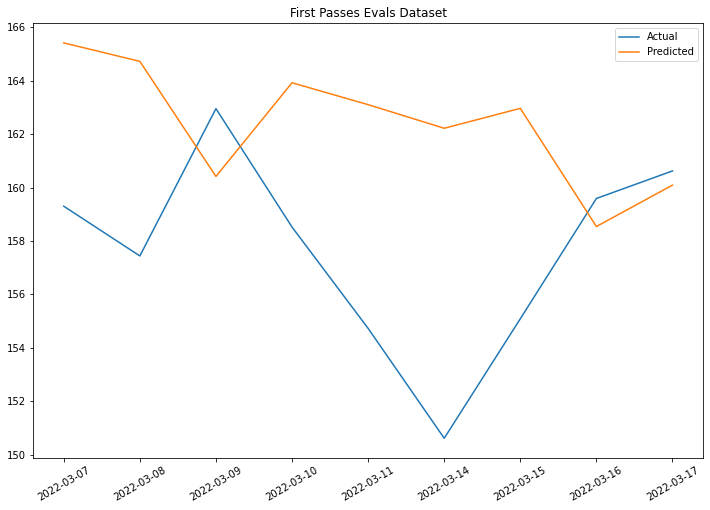

In [34]:
#//***** 256 Layers 20 EPOCHS -- LB 10 == - activation: relu Data Set: 12 months
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

    




Run Time:  910 s
Total Models:  5621
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 20, 'months_to_model': 7, 'days_to_model': 10, 'activation': 'relu', 'type': 'whole'}


Text(0.5, 1.0, 'First Passes Evals Dataset')

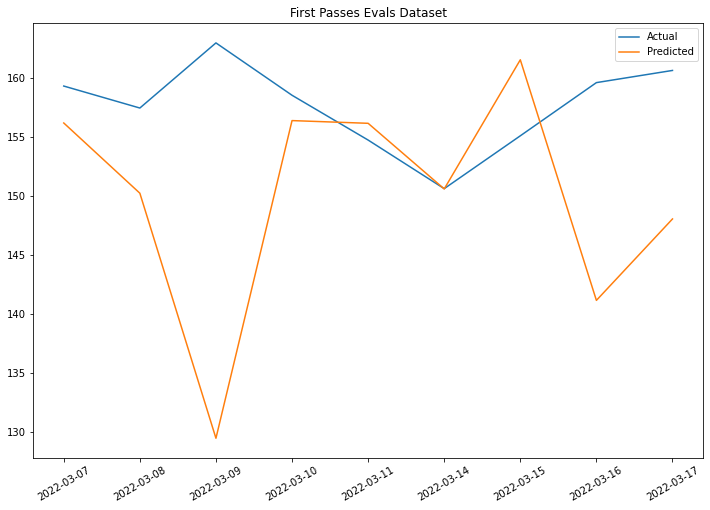

In [32]:
#//***** 256 Layers 20 EPOCHS -- LB 10 == Size 10 days - activation: relu Data Set: All
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

    




Run Time:  239 s
Total Models:  5621
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 5, 'months_to_model': 7, 'days_to_model': 10, 'activation': 'relu', 'type': 'whole'}


Text(0.5, 1.0, 'First Passes Evals Dataset')

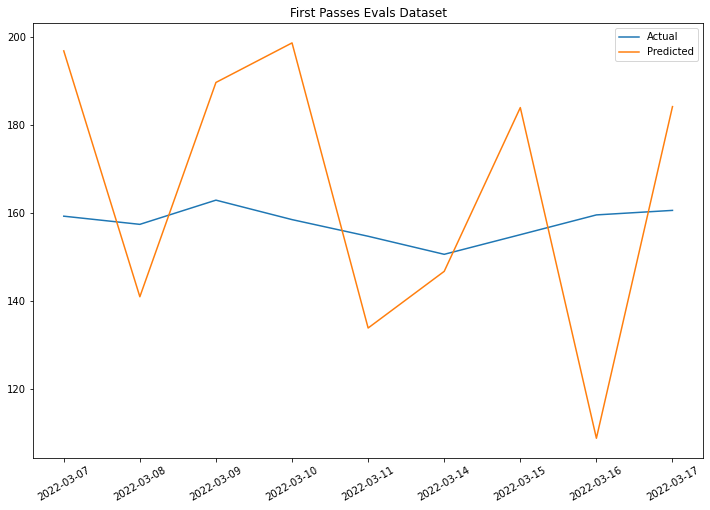

In [30]:
#//***** 256 Layers 5 EPOCHS -- LB 10 == Size 10 days - activation: relu
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

    




Run Time:  60 s
Total Models:  5621
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 1, 'months_to_model': 7, 'days_to_model': 10, 'activation': 'relu', 'type': 'whole'}


Text(0.5, 1.0, 'First Passes Evals Dataset')

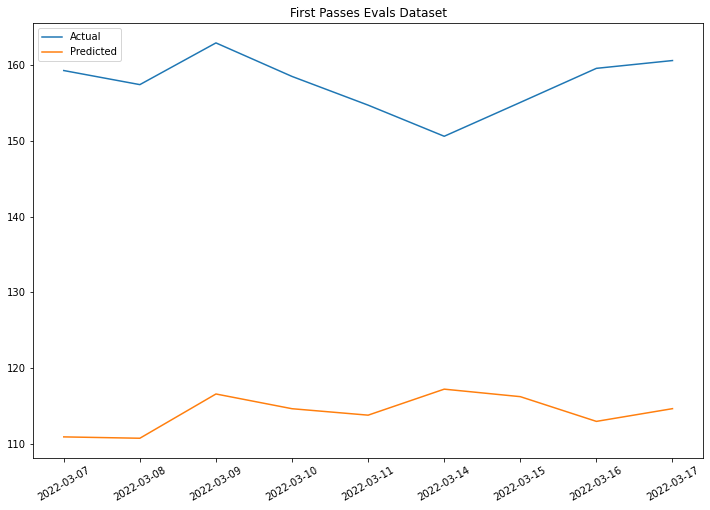

In [28]:
#//***** 256 Layers 1 EPOCHS -- LB 10 == Size 10 days - activation: relu
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

    




Run Time:  124 s
Total Models:  27
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 20, 'months_to_model': 7, 'activation': 'relu'}
[datetime.date(2022, 2, 7), datetime.date(2022, 2, 8), datetime.date(2022, 2, 9), datetime.date(2022, 2, 10), datetime.date(2022, 2, 11), datetime.date(2022, 2, 14), datetime.date(2022, 2, 15), datetime.date(2022, 2, 16), datetime.date(2022, 2, 17), datetime.date(2022, 2, 18), datetime.date(2022, 2, 22), datetime.date(2022, 2, 23), datetime.date(2022, 2, 24), datetime.date(2022, 2, 25), datetime.date(2022, 2, 28), datetime.date(2022, 3, 1), datetime.date(2022, 3, 2), datetime.date(2022, 3, 3), datetime.date(2022, 3, 4), datetime.date(2022, 3, 7), datetime.date(2022, 3, 8), datetime.date(2022, 3, 9), datetime.date(2022, 3, 10), datetime.date(2022, 3, 11), datetime.date(2022, 3, 14), datetime.date(2022, 3, 15), datetime.date(2022, 3, 16), datetime.date(2022, 3, 17)]


Text(0.5, 1.0, 'First Passes Evals Dataset')

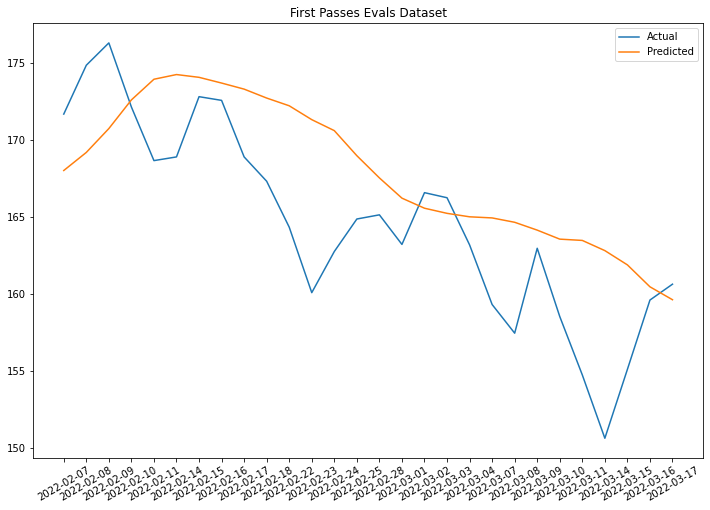

In [92]:
#//***** 256 Layers 20 EPOCHS -- LB 10 == Size 120 - Model Months: 7 - activation: relu
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

Run Time:  385 s
Total Models:  27
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 100, 'months_to_model': 7, 'activation': 'relu'}


Text(0.5, 1.0, 'First Passes Evals Dataset')

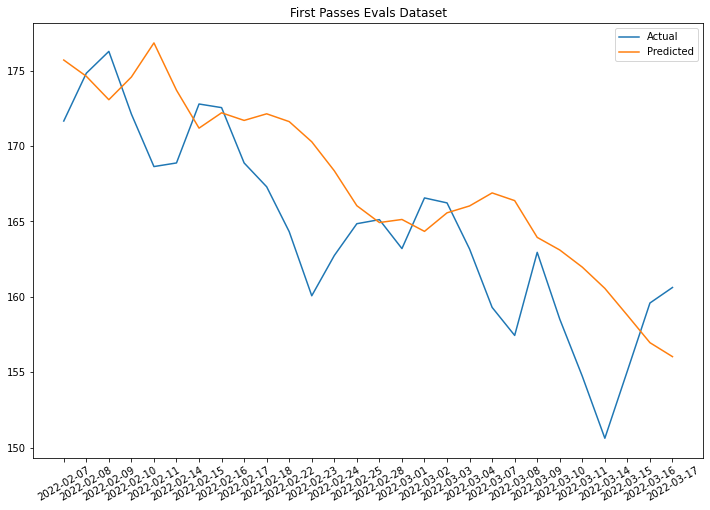

In [94]:
#//***** 256 Layers 100 EPOCHS -- LB 10 == Size 120 - Model Months: 7 - activation: relu
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

Run Time:  1026 s
Total Models:  27
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 300, 'months_to_model': 7, 'activation': 'relu'}


Text(0.5, 1.0, 'First Passes Evals Dataset')

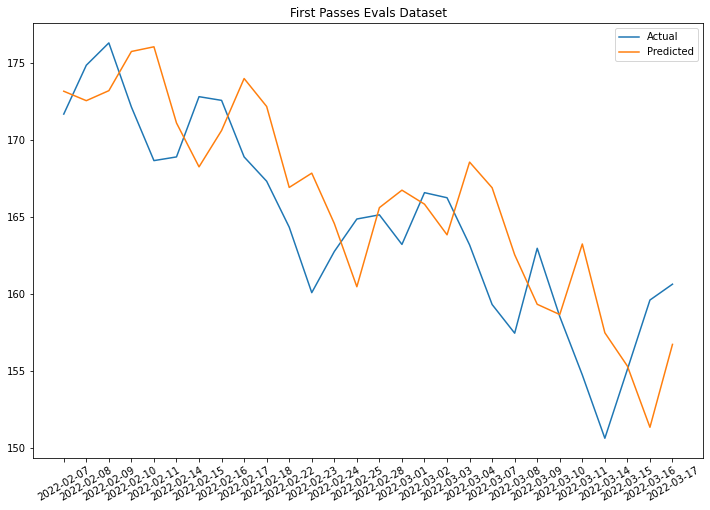

In [96]:
#//***** 256 Layers 300 EPOCHS -- LB 10 == Size 120 - Model Months: 7 - activation: relu
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

Run Time:  1398 s
Total Models:  27
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 500, 'months_to_model': 7, 'activation': 'relu'}


Text(0.5, 1.0, 'First Passes Evals Dataset')

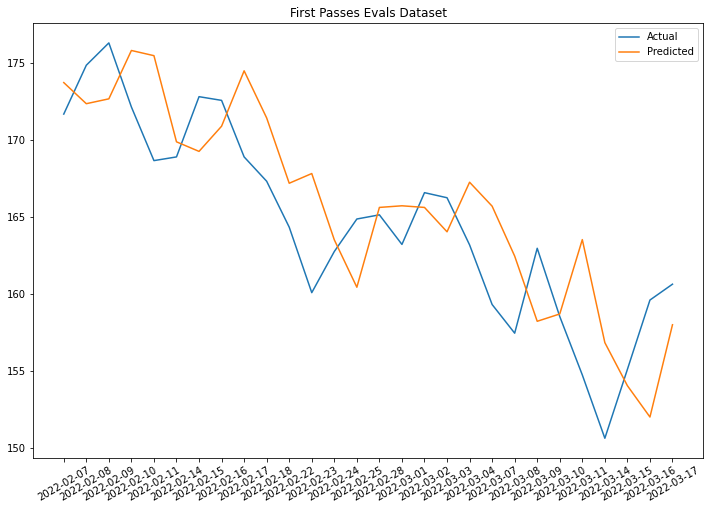

In [3]:
#//***** 256 Layers 500 EPOCHS -- LB 10 == Size 120 - Model Months: 7 - activation: relu
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

# AUTO EPOCH CODE#

In [ ]:
#Create a function to process the data into lb observations look back slices
# and create the train test dataset (90-10)
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

def build_model(num_layers,lb,activation):
    model = keras.models.Sequential()
    #model.add(layers.LSTM(num_layers,activation=activation, input_shape=(lb,1)))
    
    #//*** Hidden Layers Don't seem to be the answer
    model.add(layers.LSTM(num_layers,activation=activation,return_sequences=True, input_shape=(lb,1)))
    #model.add(layers.LSTM(num_layers,activation=activation,return_sequences=True) )
    model.add(layers.LSTM(num_layers,activation=activation) )
    model.add(layers.Dense(1))
    model.compile(optimizer='adam',loss='mse')
    
    return model
    
#//**** Model Parameters
mp = {
    'size' : 120, #//*** Total number of days to model
    'lb' : 10, #//*** Look Back, how many days prior to consider as part of the LSTM model
    'layers' : 256,
    'epochs' : 100,
    'months_to_model' : 12,
    'days_to_model' : 10,
    'activation' : 'relu',
    'type' : 'whole'
    
}
#running_loss
hp = {
    'rolling' : 10,
    'rolling_means' : [],
    'rolling_dif' : [],
}

try:
    symbol
except:
    symbol = symbols[0]
    action = "daily"
input_filename = f"./stocks/{symbol}_{action}.csv.zip"

print(f"Reading dataframe from File: {input_filename}")
out_df = pd.read_csv(input_filename)

out_df = out_df.sort_values(by='date',ascending=True)
out_df = out_df.reset_index(drop=True)
out_df['date'] = pd.to_datetime(out_df['date']).dt.date
print(len(out_df))
out_df = out_df[ out_df['date'] >= out_df['date'].max()-pd.DateOffset(months=mp['months_to_model']) ]
print(len(out_df))

epochs = -1

predictions = []
actuals = []
predict_date = []
max_loop = len(out_df)-mp['days_to_model']
start_time = time.time()
#print("1 /",max_loop)
#print(range(0,len(out_df)-mp['days_to_model']))
#[range(0,len(out_df)-mp['days_to_model'])]

#print(len(out_df),len(out_df)-mp['days_to_model'])
#print(out_df.iloc[max_loop])
print("-----")
for loop_index in range(mp['days_to_model']-1,0,-1):
    #print(loop_index)
    print("=== REFERENCE ===")
    print(out_df.iloc[range(0,len(out_df)-loop_index)])
    
    loop_time = time.time()
    #//*** Collect range of data between base_index and mp['size']
    max_index = len(out_df)-loop_index
    
    cl = out_df.iloc[0:max_index]['close'].astype('float32')
    
    y_test = out_df.iloc[max_index]['close'].astype('float32')
    print("=== CL ===")
    print(cl)
    
    #//*** Scale the Data between 0 and 1
    scl = MinMaxScaler()

    #//*** Scale and reshape the data. Each value is returned as a list within a list
    cl = scl.fit_transform(cl.values.reshape(-1,1))
    #print(cl)
    
    #//*** Build Data for Lookback arrays
    X_train,y_train = processData(cl,mp['lb'])

    #print("== X ==")
    #print(X_train)
    #print("== y ==")
    #print(y_train)

    #print(X_train.shape,y_train.shape)
    
    #//*** Build the test value using the last element of X_train
    x_test = X_train[-1]

    #//*** Remove the first element
    x_test = np.delete(x_test,0)
    #//*** Add the last element of y_train, as our predict ahead
    x_test = np.append(x_test,y_train[-1])
    
    disp_x_train = X_train    
    
    X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
    #X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
    #Fit model with history to check for overfitting

    #//*** Reshape x_test to match the X_train shape
    x_test = X_train[-1].reshape((X_train[-1].shape[1],X_train[-1].shape[0],1))

    #model.summary() 
    
    model = build_model(mp['layers'],mp['lb'],mp['activation'])
    prev = -1
    running = []
    gradient_counter = 1
    gradient_threshold = 5
    gradient_percentage_threshold = .01
    #gradient_percentage_threshold = .05
    for x in range(300):

        model.fit(X_train,y_train,epochs=1,shuffle=False,verbose=0)
        Xt = model.predict(x_test)

        qpredict = scl.inverse_transform(Xt)[0][0]

        running.append(qpredict)

        rolling = np.array(running[-10:]).mean()


        
        
        if x > gradient_threshold:
            diff = abs(((qpredict - rolling)/qpredict))

            if diff <= gradient_percentage_threshold:
                gradient_counter += 1
            else:
                gradient_counter = 1
            
            print(x,qpredict,rolling,diff,gradient_counter )
            
            if gradient_counter > gradient_threshold:
                print("THRESHOLD MET")
                break
        else:
            print(x, " / ",gradient_threshold)

        #prev=qpredict


    
    
    
    #model = build_model(mp['layers'],mp['lb'],mp['activation'])

        
    #model.fit(X_train,y_train,epochs=mp['epochs'],shuffle=False,verbose=1)
    
    Xt = model.predict(x_test)
    
    predict = scl.inverse_transform(Xt)[0][0]
    predictions.append(predict)
    actuals.append(y_test)
    predict_date.append(out_df.iloc[max_index]['date'])
    remain_loop = loop_index
    cycle_time = int(time.time() - loop_time)
    
    #clear_output(wait=True)
    print(loop_index,"/",mp['days_to_model'],"[",predict,"] - ",y_test, " ",cycle_time, "s - remaining: ",cycle_time*remain_loop,"s" )
    print("======")
    #break
    #    #break
    
    if True: #//*** Print as needed
        print(out_df.iloc[loop_index:max_index])

        print("X_Train")
        
        #print(scl.inverse_transform(x_test.reshape(-1,1)).reshape(1,-1))
        for n in scl.inverse_transform(disp_x_train)[-10:]:
            print(n[-5:])
        print("Y_train")
        print(scl.inverse_transform(y_train.reshape(-1,1))[-10:])
        print("X_test")
        print(scl.inverse_transform(x_test.reshape(-1,1)).reshape(1,-1))
        print("Actual:")
        print(out_df.iloc[max_index])
        print("y_test:",y_test)
        print(out_df.iloc[max_index]['date'])

total_time = int(time.time() - start_time)

print("=================")
print("DONE: ", total_time,"secs")
print("=================")
playsound.playsound(sound_filename)